<a href="https://colab.research.google.com/github/db-telkomsby/bigdataanalytic/blob/main/Modul2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Modul2Tambahan.csv')
df

,Nama,Asal,Divisi,Usia,LamaKerja,Gaji
0,John Doe,Surabaya,5,32,3,3500000
1,Jane Smith,Malang,3,28,4,6000000
2,David Johnson,Mojokerto,3,35,5,6000000
3,Sarah Williams,Malang,1,29,5,5500000
4,Michael Brown,Surabaya,5,40,3,3500000
...,...,...,...,...,...,...
119,Emily Wright,Mojokerto,5,36,5,5000000
120,Liam Green,Surabaya,3,33,2,4500000
121,Olivia Rodriguez,Jogja,5,37,2,3500000
122,Mia Anderson,Malang,5,33,4,5000000


In [ ]:
df.head(5)

,Nama,Asal,Divisi,Usia,LamaKerja,Gaji
0,John Doe,Surabaya,5,32,3,3500000
1,Jane Smith,Malang,3,28,4,6000000
2,David Johnson,Mojokerto,3,35,5,6000000
3,Sarah Williams,Malang,1,29,5,5500000
4,Michael Brown,Surabaya,5,40,3,3500000


In [ ]:
df.tail(5)

,Nama,Asal,Divisi,Usia,LamaKerja,Gaji
119,Emily Wright,Mojokerto,5,36,5,5000000
120,Liam Green,Surabaya,3,33,2,4500000
121,Olivia Rodriguez,Jogja,5,37,2,3500000
122,Mia Anderson,Malang,5,33,4,5000000
123,Alexander Hall,Surabaya,1,31,5,5500000


In [ ]:
df.sample(10)

,Nama,Asal,Divisi,Usia,LamaKerja,Gaji
103,Alexander Perez,Jogja,3,36,2,4500000
107,Noah Turner,Surabaya,4,29,5,4000000
92,Charlotte Martin,Surabaya,5,34,2,3500000
110,Mia Scott,Bandung,5,28,2,3500000
50,Ethan Martinez,Jakarta,5,33,4,5000000
73,Mia Lewis,Bandung,4,37,3,2500000
27,Nisa Cahaya,Surabaya,2,24,5,4000000
86,Mia Brown,Surabaya,4,29,5,4000000
80,Emma Turner,Mojokerto,2,36,3,2500000
62,Mason Martinez,Malang,1,33,2,3000000


In [ ]:
df.columns

Index(['Nama', 'Asal', 'Divisi', 'Usia', 'LamaKerja', 'Gaji'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nama       124 non-null    object
 1   Asal       124 non-null    object
 2   Divisi     124 non-null    int64 
 3   Usia       124 non-null    int64 
 4   LamaKerja  124 non-null    int64 
 5   Gaji       124 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.9+ KB


In [ ]:
df.describe()

,Divisi,Usia,LamaKerja,Gaji
count,124.000000,124.000000,124.000000,1.240000e+02
mean,3.080645,32.403226,3.693548,4.189516e+06
std,1.595710,3.660200,1.105621,1.099876e+06
min,1.000000,21.000000,2.000000,2.500000e+06
25%,2.000000,30.000000,3.000000,3.500000e+06
50%,3.000000,33.000000,4.000000,4.000000e+06
75%,5.000000,35.000000,5.000000,5.000000e+06
max,6.000000,42.000000,5.000000,6.000000e+06


In [ ]:
obj=df.select_dtypes(include=['object'])
num=df.select_dtypes(exclude=['object'])

In [ ]:
obj

,Nama,Asal
0,John Doe,Surabaya
1,Jane Smith,Malang
2,David Johnson,Mojokerto
3,Sarah Williams,Malang
4,Michael Brown,Surabaya
...,...,...
119,Emily Wright,Mojokerto
120,Liam Green,Surabaya
121,Olivia Rodriguez,Jogja
122,Mia Anderson,Malang


In [ ]:
num

,Divisi,Usia,LamaKerja,Gaji
0,5,32,3,3500000
1,3,28,4,6000000
2,3,35,5,6000000
3,1,29,5,5500000
4,5,40,3,3500000
...,...,...,...,...
119,5,36,5,5000000
120,3,33,2,4500000
121,5,37,2,3500000
122,5,33,4,5000000


In [ ]:
num.isna().sum()

Divisi       0
Usia         0
LamaKerja    0
Gaji         0
dtype: int64

In [ ]:
num.isna().any().sum()

0

In [ ]:
num.duplicated().value_counts()

False    101
True      23
dtype: int64

In [ ]:
num.duplicated().sum()

23

In [ ]:
statMDL=smf.ols('Gaji~Divisi+Usia+LamaKerja',data=num).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gaji   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     30.95
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           6.84e-15
Time:                        14:13:41   Log-Likelihood:                -1864.8
No. Observations:                 124   AIC:                             3738.
Df Residuals:                     120   BIC:                             3749.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.132e+06    7.5e+05      1.510      0.1

In [ ]:
x=df[['Usia','LamaKerja']]
y=df['Gaji']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.50,random_state=42)
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions=l.predict(x_test)

In [ ]:
print('Coefficients: ',l.coef_)
print('Intercept: ',l.intercept_)
print('MAS: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
accuracy=l.score(x_test,y_test)
print('AccuracyII: ', accuracy*100, '%')
print('R2: ', r2_score(y_test, predictions))

Coefficients:  [ 50005.88469162 584271.83400003]
Intercept:  492741.19700368587
MAS:  677685.051443363
MSE:  684658364567.5138
RMSE:  827440.8526097281
AccuracyII:  41.79949682889157 %
R2:  0.4179949682889157


In [ ]:
print('Train set accuracy: ', r2_score(y_train,l.predict(x_train)), '%')
print('Test set accuracy: ', r2_score(y_test,predictions), '%')

Train set accuracy:  0.38676555136387925 %
Test set accuracy:  0.4179949682889157 %


In [ ]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df2['Eror']=df2['Actual']-df2['Predicted']
df2

,Actual,Predicted,Eror
18,4500000,4.630040e+06,-1.300404e+05
42,4500000,3.161461e+06,1.338539e+06
36,4500000,4.045769e+06,4.542315e+05
76,4000000,4.480023e+06,-4.800227e+05
53,6000000,5.164306e+06,8.356937e+05
...,...,...,...
68,2500000,3.061450e+06,-5.614496e+05
34,2500000,3.295680e+06,-7.956803e+05
114,2500000,4.095774e+06,-1.595774e+06
7,3500000,3.795739e+06,-2.957391e+05


<Axes: xlabel='Gaji'>

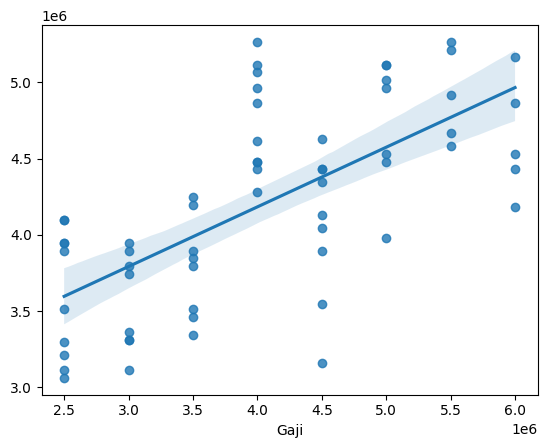

In [ ]:
sns.regplot(x=y_test, y=predictions)

<function matplotlib.pyplot.show(close=None, block=None)>

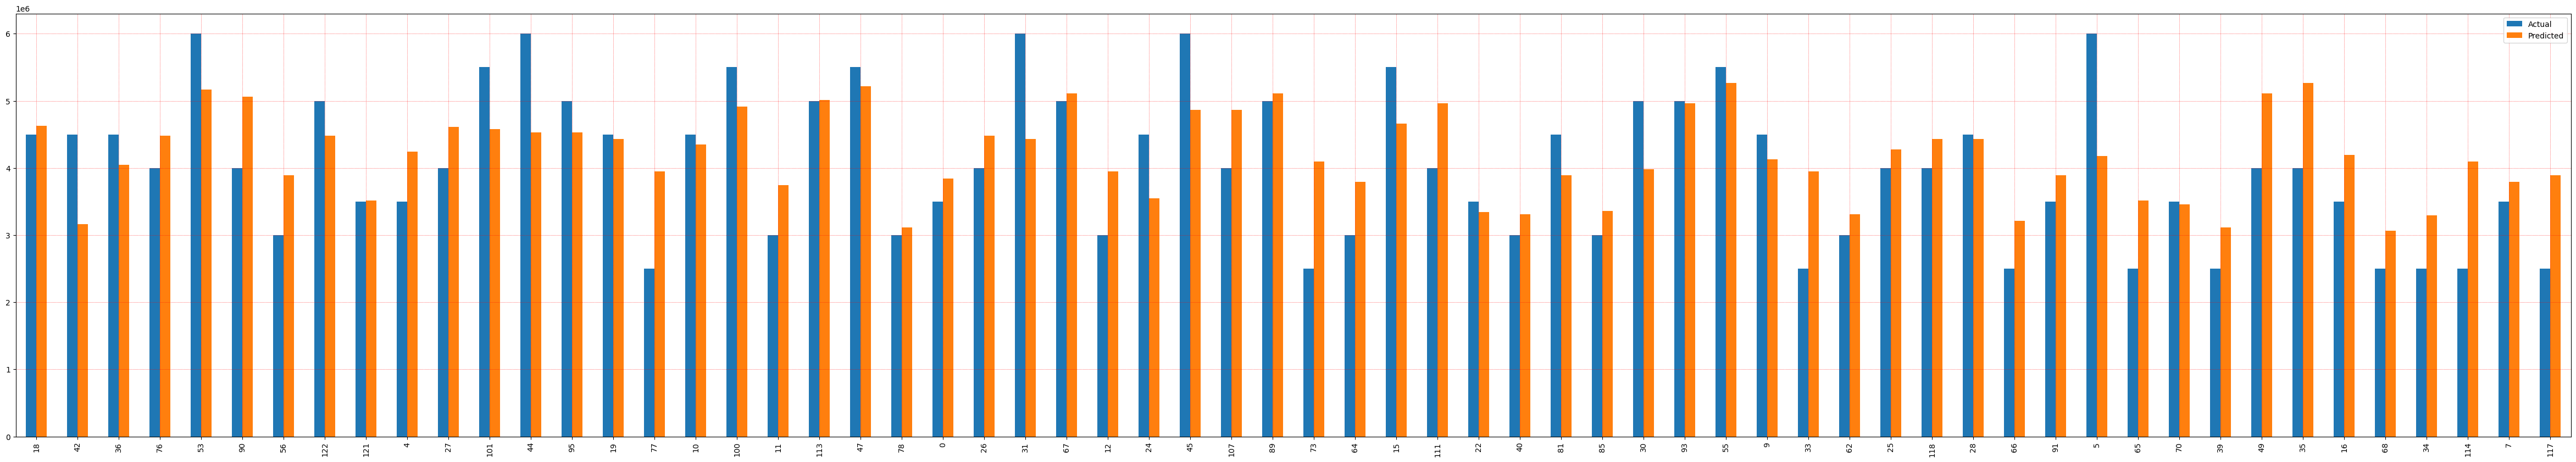

In [ ]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

df2.plot(kind='bar', figsize=(60,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='red')
plt.show

In [ ]:
new_observation=[[30,5]]
l.predict(new_observation)

array([4914276.90775243])